# 🛒 E-commerce Customer Behavior Analysis

## 📋 Table of Contents
1. [Introduction](#1-Introduction)  
2. [Data Loading & Overview](#2-Data-Loading--Overview)  
3. [Data Cleaning](#3-Data-Cleaning)  
4. [Feature Engineering](#4-Feature-Engineering)  
5. [Exploratory Data Analysis (EDA)](#5-Exploratory-Data-Analysis-EDA)  
6. [Key Insights](#6-Key-Insights)  
7. [Conclusion](#7-Conclusion)


## 🧾 1. Introduction
- **Objective:** Perform EDA to understand customer behavior, top-selling products, and revenue trends in an online store.
- **Dataset:** Online Retail data from UCI or Kaggle
- **Tools used:** Python, pandas, matplotlib, seaborn


## 📂 2. Data Loading & Overview

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('D:\GOW\Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## 🧹 3. Data Cleaning

In [10]:
df = df[df['CustomerID'].notnull()]

df = df[df['Quantity'] > 0]

df.drop_duplicates(inplace=True)

## ⚙️ 4. Feature Engineering

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

## 📊 5. Exploratory Data Analysis (EDA)

### 📌 5.1 Top 10 Products by Revenue

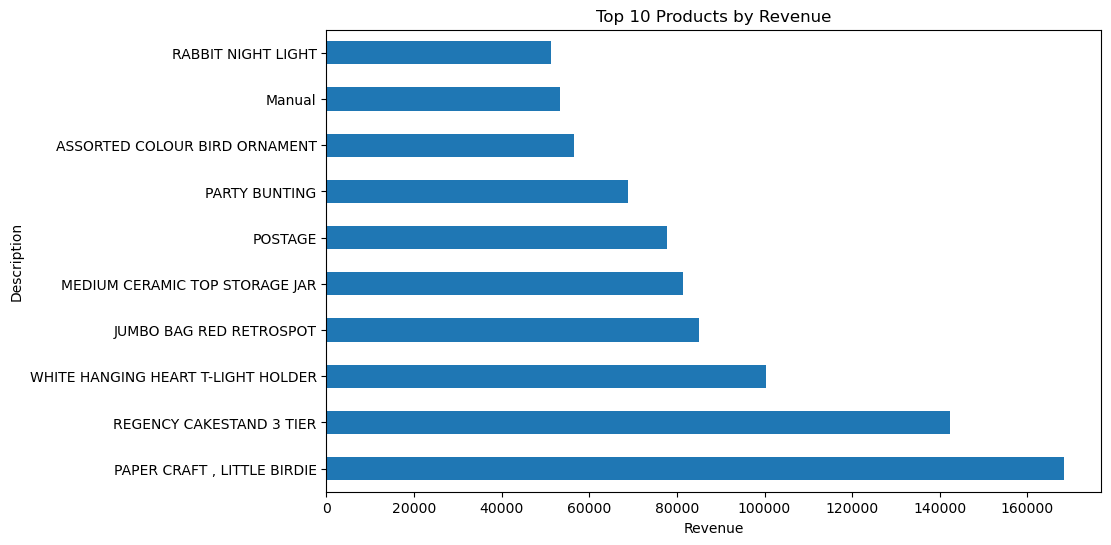

In [12]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Products by Revenue')
plt.xlabel("Revenue")
plt.show()

### 📌 5.2 Sales Over Time

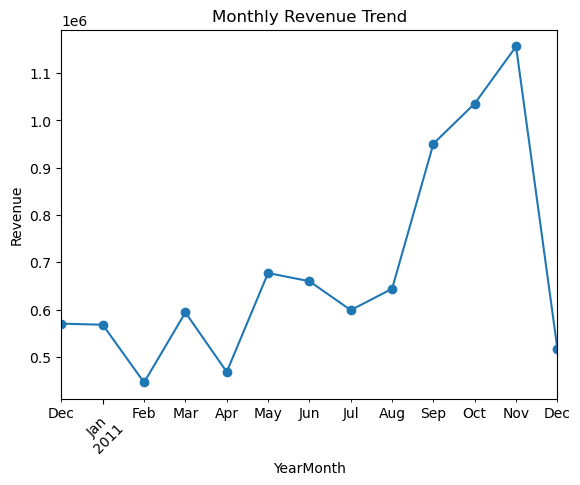

In [13]:
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()
monthly_sales.plot(marker='o', title='Monthly Revenue Trend')
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

### 📌 5.3 Country-wise Orders

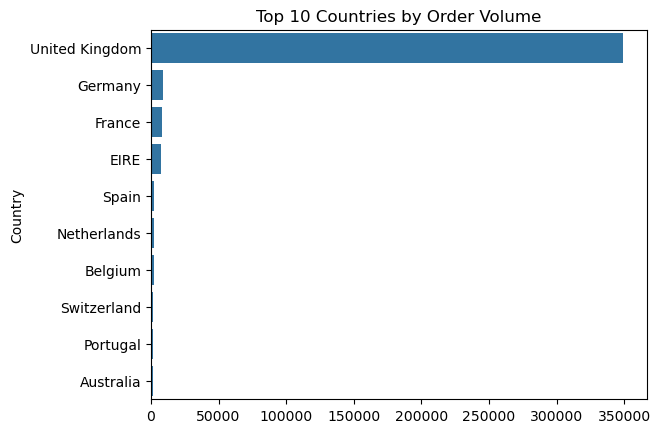

In [14]:
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Order Volume")
plt.show()

## 💡 6. Key Insights

- The top 5 products account for X% of the revenue.
- UK is the dominant market with most transactions.
- Revenue peaks in November–December, possibly due to holiday season.


## 📌 7. Conclusion

This EDA helped uncover sales patterns, top products, and customer behaviors.  
Potential next steps could include:
- Customer segmentation (RFM analysis)
- Building a recommendation system
- Visualizing key metrics in Tableau/Power BI
